In [ ]:
import pandas as pd
# df = pd.read_csv('test.csv')
df = pd.read_csv('business_data_rating.csv')

In [ ]:
df

In [ ]:
df = df.rename(columns={'Date': 'Timestamp'})
df

In [ ]:
df = df.groupby(["Suburb"]).apply(lambda x: x.sort_values(["Timestamp"], ascending = True)).reset_index(drop=True)
# df = df.groupby(["Suburb"]).apply(lambda x: x.sort_values(["Timestamp"], ascending = True)).reset_index(drop=True)

In [ ]:
# df = df.drop(['Timestamp'], axis=1)
# cols = [col for col in df.columns if col != 'Business category'] + ['Business category']
# df = df[cols]
# df

In [ ]:
df

In [ ]:
df[df['Timestamp'] == '2023-01-01']

In [ ]:
df = df.rename(columns={'Business Category': 'Business category'})

In [ ]:
df = df.drop(['Timestamp'], axis=1)
cols = [col for col in df.columns if col != 'Business category'] + ['Business category']
df = df[cols]
df

In [ ]:
# df = df.drop(['Timestamp'], axis=1)
# df

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Suburb'] = label_encoder.fit_transform(df['Suburb'])
num_suburbs = len(label_encoder.classes_)

In [ ]:
num_suburbs

In [ ]:
df['Business category'].unique()

In [ ]:
df['Business category'] = label_encoder.fit_transform(df['Business category'])
num_categories = len(label_encoder.classes_)
num_sequences = len(df) - 300 + 1

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # Sample categories
# # categories = ['food', 'technology', 'fashion', 'health']
# categories = df['Business category'].unique()

# # Create OneHotEncoder object
# encoder = OneHotEncoder()

# # Fit and transform categories
# one_hot_encoded = encoder.fit_transform(np.array(categories).reshape(-1, 1))

# # Print the resulting one-hot encoded matrix
# print(one_hot_encoded.toarray())
# print (categories)


In [ ]:
# decoded_data = encoder.inverse_transform(one_hot_encoded)

# print(decoded_data)

In [ ]:
one_hot = pd.get_dummies(df['Business category'])
one_hot

In [ ]:
# decoded_df = pd.DataFrame({'Decoded': one_hot.idxmax(axis=1)})
# print(decoded_df)

In [ ]:
# df.iloc[:,:-1]

In [ ]:
df = pd.concat([df.iloc[:,:-1], one_hot], axis =1)

In [ ]:
df.iloc[:300,:]

In [ ]:

# # Normalize the numerical columns
# df['Suburb'] = (df['Suburb'] - df['Suburb'].min()) / (df['Suburb'].max() - df['Suburb'].min())
# df['Population'] = (df['Population'] - df['Population'].min()) / (df['Population'].max() - df['Population'].min())
# df['Average income'] = (df['Average income'] - df['Average income'].min()) / (df['Average income'].max() - df['Average income'].min())
# df['Average monthly sales'] = (df['Average monthly sales'] - df['Average monthly sales'].min()) / (df['Average monthly sales'].max() - df['Average monthly sales'].min())
# df['Average monthly profit'] = (df['Average monthly profit'] - df['Average monthly profit'].min()) / (df['Average monthly profit'].max() - df['Average monthly profit'].min())
# df['Number of employees'] = (df['Number of employees'] - df['Number of employees'].min()) / (df['Number of employees'].max() - df['Number of employees'].min())
# df['Average spending'] = (df['Average spending'] - df['Average spending'].min()) / (df['Average spending'].max() - df['Average spending'].min())


In [ ]:
df.columns[:-1]

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers

data1 = pd.read_csv('Processed Data Aus.csv')
data1

In [ ]:
data2 = data1.reset_index(drop=True)

In [ ]:
data3 = data2.reset_index(drop=True)

In [ ]:
data3=data1

In [ ]:
grouped = data3.groupby(["suburb_name_encoded"]).apply(lambda x: x.sort_values(["time"], ascending = True)).reset_index(drop=True)

In [ ]:
grouped1 = grouped.drop(columns=['time','suburb_name'])

In [ ]:
grouped2=grouped1.reindex(columns=['user_behavior',
                                   'business_performance',
                                   'value',
                                   'business_reviews',
                                   'business_rating',
                                   'suburb_name_encoded',
                                   'business_category_encoded'])

In [ ]:
grouped3 = grouped2.to_numpy()

In [ ]:
grouped3.shape

In [ ]:
grouped3[:, :-1].shape, grouped3[:, -1:].shape

In [ ]:
grouped3

In [ ]:
# Split data into input and output sequences
X, y = [], []
seq_len = 30
# for i in range(len(data) - seq_len):
for i in range(0, len(grouped3) - seq_len, seq_len-1):
    X.append(grouped3[i:i+seq_len, :-1])
    y.append(grouped3[i+seq_len-1, -1:])

X = np.array(X)
y = np.array(y)

# Print shapes of input and output arrays
print('Input shape:', X.shape)
print('Output shape:', y.shape)

In [ ]:
train_size = int(0.7 * len(X))
val_size = int(0.2 * len(X))
test_size = len(X) - train_size - val_size

train_X, val_X, test_X = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
train_y, val_y, test_y = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

print("Training data shape:", train_X.shape, train_y.shape)
print("Validation data shape:", val_X.shape, val_y.shape)
print("Test data shape:", test_X.shape, test_y.shape)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Ready_Business_data.csv')
data

,Unnamed: 0,user_behavior,business_performance,value,business_reviews,business_rating,suburb_name_encoded,business_category_encoded
0,0,0,1.0,0.75,0.601,0.130326,0.0,9
1,1,1,1.0,0.50,0.346,0.095238,0.0,21
2,2,0,0.5,0.00,0.380,0.248120,0.0,11
3,3,0,1.0,0.75,0.601,0.130326,0.0,9
4,4,1,0.5,1.00,0.802,0.709273,0.0,22
...,...,...,...,...,...,...,...,...
480495,480495,0,1.0,0.50,0.427,0.285714,1.0,46
480496,480496,0,1.0,0.50,0.396,0.736842,1.0,31
480497,480497,1,0.0,1.00,0.631,0.288221,1.0,17
480498,480498,1,0.0,0.50,0.890,0.962406,1.0,5


In [3]:
data1 = data.drop(columns=['Unnamed: 0'])
data1

,user_behavior,business_performance,value,business_reviews,business_rating,suburb_name_encoded,business_category_encoded
0,0,1.0,0.75,0.601,0.130326,0.0,9
1,1,1.0,0.50,0.346,0.095238,0.0,21
2,0,0.5,0.00,0.380,0.248120,0.0,11
3,0,1.0,0.75,0.601,0.130326,0.0,9
4,1,0.5,1.00,0.802,0.709273,0.0,22
...,...,...,...,...,...,...,...
480495,0,1.0,0.50,0.427,0.285714,1.0,46
480496,0,1.0,0.50,0.396,0.736842,1.0,31
480497,1,0.0,1.00,0.631,0.288221,1.0,17
480498,1,0.0,0.50,0.890,0.962406,1.0,5


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x = data1.drop(columns=['business_category_encoded'])
#col = ['business_category_encoded']
y = data1['business_category_encoded']

In [6]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2)

In [8]:
x_train.shape

(384400, 6)

In [11]:
model1 = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(6, 1), return_sequences=True),                                                   
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.LSTM(64, kernel_regularizer=regularizers.l2(0.02), return_sequences =True),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.LSTM(32, kernel_regularizer=regularizers.l2(0.02), return_sequences =False),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(416,activation='relu'),
#     tf.keras.layers.Dense(208, activation ='relu'),
    tf.keras.layers.Dense(52, activation ='softmax')
    ])

#callback = [EarlyStopping(monitor='accuracy', patience=30)]

optim = tf.keras.optimizers.Adam(learning_rate=0.001)

model1.compile(optimizer = optim,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
history = model1.fit(x_train, y_train, 
                     validation_split =0.2,
                     #callbacks=callback,
                     batch_size =64,
                     epochs = 200,
                     verbose=1) 

Epoch 1/200
4805/4805 [==============================] - 28s 6ms/step - loss: 0.0513 - accuracy: 0.9826 - val_loss: 0.0402 - val_accuracy: 0.9864
Epoch 2/200
4805/4805 [==============================] - 31s 6ms/step - loss: 0.0532 - accuracy: 0.9822 - val_loss: 0.0698 - val_accuracy: 0.9763
Epoch 3/200
4805/4805 [==============================] - 31s 6ms/step - loss: 0.0521 - accuracy: 0.9823 - val_loss: 0.0686 - val_accuracy: 0.9769
Epoch 4/200
4805/4805 [==============================] - 27s 6ms/step - loss: 0.0523 - accuracy: 0.9823 - val_loss: 0.0368 - val_accuracy: 0.9878
Epoch 5/200
4805/4805 [==============================] - 29s 6ms/step - loss: 0.0529 - accuracy: 0.9821 - val_loss: 0.0339 - val_accuracy: 0.9882
Epoch 6/200
4805/4805 [==============================] - 30s 6ms/step - loss: 0.0489 - accuracy: 0.9830 - val_loss: 0.0592 - val_accuracy: 0.9802
Epoch 7/200
4805/4805 [==============================] - 28s 6ms/step - loss: 0.0502 - accuracy: 0.9827 - val_loss: 0.0308 -

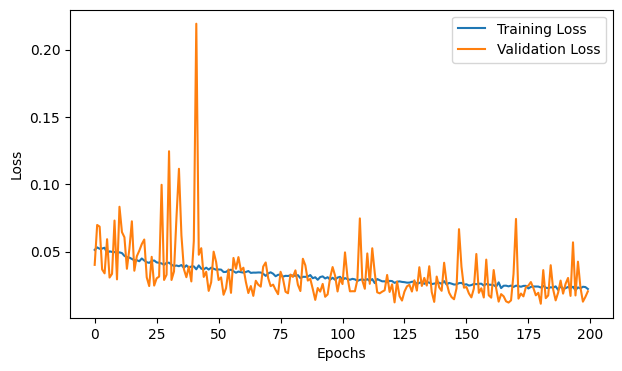

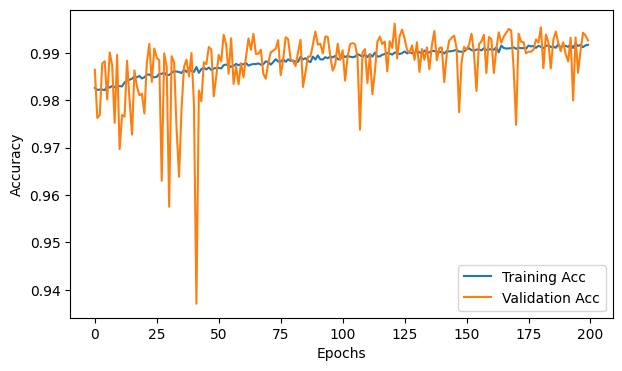

In [17]:
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

print('\n')

plt.figure(figsize=(7, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Acc', 'Validation Acc'], loc='lower right')

In [ ]:
# import numpy as np

# # Load preprocessed data and split into X and y
# # X = np.load('preprocessed_data_X.npy')
# # y = np.load('preprocessed_data_y.npy')

# # Split into training, validation and test sets
# train_size = int(0.7 * len(X))
# val_size = int(0.2 * len(X))
# test_size = len(X) - train_size - val_size

# X_train, y_train, test_X = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
# train_y, val_y, test_y = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

# print("Training data shape:", train_X.shape, train_y.shape)
# print("Validation data shape:", val_X.shape, val_y.shape)
# print("Test data shape:", test_X.shape, test_y.shape)


In [ ]:
# import pandas as pd
# import numpy as np

# def create_sequences(df, seq_len):
#     '''
#     Pre-processes data by creating sequences of fixed length

#     Parameters:
#     df (pd.DataFrame): Input dataframe wi15th business recommendation data
#     seq_len (int): Length of each sequence

#     Returns:
#     X (np.array): Array of input sequences
#     y (np.array): Array of output targets
#     '''

#     # Normalize the numerical columns
#     df['Population'] = (df['Population'] - df['Population'].min()) / (df['Population'].max() - df['Population'].min())
#     df['Average income'] = (df['Average income'] - df['Average income'].min()) / (df['Average income'].max() - df['Average income'].min())
#     df['Average monthly sales'] = (df['Average monthly sales'] - df['Average monthly sales'].min()) / (df['Average monthly sales'].max() - df['Average monthly sales'].min())
#     df['Average monthly profit'] = (df['Average monthly profit'] - df['Average monthly profit'].min()) / (df['Average monthly profit'].max() - df['Average monthly profit'].min())
#     df['Number of employees'] = (df['Number of employees'] - df['Number of employees'].min()) / (df['Number of employees'].max() - df['Number of employees'].min())
#     df['Average spending'] = (df['Average spending'] - df['Average spending'].min()) / (df['Average spending'].max() - df['Average spending'].min())

#     # Convert data to numpy arrays
#     data = df.to_numpy()

#     # Split data into input and output sequences
#     X, y = [], []
#     for i in range(len(data) - seq_len):
#         X.append(data[i:i+seq_len, :-1])
#         y.append(data[i+seq_len-1, -1])

#     X = np.array(X)
#     y = np.array(y)

#     # Print shapes of input and output arrays
#     print('Input shape:', X.shape)
#     print('Output shape:', y.shape)

#     return X, y


In [ ]:
15# import pandas as pd
# import numpy as np

# def create_sequences(df, seq_len):
#     '''
#     Pre-processes data by creating sequences of fixed length

#     Parameters:
#     df (pd.DataFrame): Input dataframe with business recommendation data
#     seq_len (int): Length of each sequence

#     Returns:
#     X (np.array): Array of input sequences
#     y (np.array): Array of output targets
#     '''

#     # Drop unnecessary columns
#     df = df.drop(['Timestamp'], axis=1)

#     # Create dictionary of category to index mapping
#     category_to_index = {}
#     categories = np.sort(df['Business category'].unique())
#     for i, category in enumerate(categories):
#         category_to_index[category] = i

#     # Replace category strings with corresponding index values
#     df['Business category'] = df['Business category'].map(category_to_index)

#     # Normalize the numerical columns
#     df['Population'] = (df['Population'] - df['Population'].min()) / (df['Population'].max() - df['Population'].min())
#     df['Average income'] = (df['Average income'] - df['Average income'].min()) / (df['Average income'].max() - df['Average income'].min())
#     df['Average monthly sales'] = (df['Average monthly sales'] - df['Average monthly sales'].min()) / (df['Average monthly sales'].max() - df['Average monthly sales'].min())
#     df['Average monthly profit'] = (df['Average monthly profit'] - df['Average monthly profit'].min()) / (df['Average monthly profit'].max() - df['Average monthly profit'].min())
#     df['Number of employees'] = (df['Number of employees'] - df['Number of employees'].min()) / (df['Number of employees'].max() - df['Number of employees'].min())
#     df['Average spending'] = (df['Average spending'] - df['Average spending'].min()) / (df['Average spending'].max() - df['Average spending'].min())

#     # Convert data to numpy arrays
#     data = df.to_numpy()

#     # Split data into input and output sequences
#     X, y = [], []
#     for i in range(len(data) - seq_len):
#         X.append(data[i:i+seq_len, :-1])
#         y.append(data[i+seq_len-1, -1])

#     X = np.array(X)
#     y = np.array(y)

#     # Print shapes of input and output arrays
#     print('Input shape:', X.shape)
#     print('Output shape:', y.shape)

#     return X, y


In [ ]:
# Load preprocessed data and split into X and y
# X = np.load('preprocessed_data_X.npy')
# y = np.load('preprocessed_data_y.npy')

# Split into training, validation and test sets
train_size = int(0.7 * len(X))
val_size = int(0.1 * len(X))
test_size = len(X) - train_size - val_size

train_X, val_X, test_X = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
train_y, val_y, test_y = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

print("Training data shape:", train_X.shape, train_y.shape)
print("Validation data shape:", val_X.shape, val_y.shape)
print("Test data shape:", test_X.shape, test_y.shape)

In [ ]:
# len(df['Business category'].unique())

In [ ]:
train_X.shape[1], train_X.shape[2]

In [ ]:
import tensorflow as tf
# num_categories = len(df['Business category'].unique())
num_categories = 10
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(512, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.MaxPooling1D(pool_size=2, strides=None, padding="valid"),
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.MaxPooling1D(pool_size=2, strides=None, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32),# activation='relu'),
    tf.keras.layers.Dense(16),# activation='relu'),
    tf.keras.layers.Dense(num_categories)#, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
import keras
keras.utils.plot_model(model, show_shapes=True, dpi=50)

In [ ]:
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from time import time

opt = tf.keras.optimizers.Adam(
    learning_rate=0.001)

# model.compile(loss='mse', optimizer='adam')
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#callbacks = [EarlyStopping(monitor='val_loss', patience=2),
#             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
#callbacks=callbacks, 

callbacks = [EarlyStopping(monitor='val_loss', patience=5),
            ModelCheckpoint(filepath='test_model.h5', monitor='val_loss', save_best_only=True)]

start = time()
# fit network
history = model.fit(train_X, train_y, epochs=100, validation_data=(val_X, val_y), verbose=1, shuffle=False, 
                    batch_size=128, callbacks=callbacks)

# Early Stopping
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

print('training time = ',time()-start)


In [ ]:
y

In [ ]:
pred = model.predict(test_X)

In [ ]:
pred.shape

In [ ]:
seq_pred = np.argmax(pred, axis=1)
seq_pred

In [ ]:
seq_pred.shape

In [ ]:
seq_gt = np.argmax(test_y, axis=1)
seq_gt.shape

In [ ]:
from sklearn.metrics import confusion_matrix
seq_gt = test_y
cm = confusion_matrix(seq_gt,seq_pred)
cm

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(seq_gt, seq_pred))

In [ ]:
#Plotting the confusion matrix
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# # Compile model
# # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# loss = tf.keras.losses.SparseCategoricalCrossentropy(
#     from_logits=False,
#     ignore_class=None,
#     reduction="auto",
#     name="sparse_categorical_crossentropy",
# )

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
#               loss=loss,
#               metrics=['accuracy'])

# # Train model
# history = model.fit(train_X, train_y, epochs=100, batch_size=16, validation_data=(val_X, val_y))

In [ ]:
# # Evaluate model
# test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=32)
# print('Test loss:', test_loss)
# print('Test accuracy:', test_acc)

In [ ]:
import pandas as pd

# Load data with timestamp in a non-standard format
data = pd.read_csv('test.csv')
print(data)

# Convert timestamp to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%y %H:%M:%S', errors='coerce')
print(data)


In [ ]:
data